<a href="https://colab.research.google.com/github/oz-e/applied-ml/blob/main/create_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Change the path if necessary
datasets_path = 'datasets'

In [2]:
import os
import torchvision

def download_dataset(root, dataset_name):
  match dataset_name:
    case 'caltech101':
      torchvision.datasets.Caltech101(root, download=True)
    case 'oxfordpets':
      torchvision.datasets.OxfordIIITPet(root, download=True)
    case 'flowers102':
      torchvision.datasets.Flowers102(root, download=True)
    case 'food101':
      torchvision.datasets.Food101(root, download=True)
    case 'dtd':
      torchvision.datasets.DTD(root, download=True)
    case 'eurosat':
      torchvision.datasets.EuroSAT(root, download=True)
    case 'ucf101':
      torchvision.datasets.utils.download_and_extract_archive('https://drive.google.com/file/d/10Jqome3vtUA2keJkNanAiFpgbyC9Hc2O', os.path.join(root, 'ucf101'), filename='UCF-101-midframes.zip')

In [3]:
# Split datasets (train, val, test) according to https://github.com/KaiyangZhou/CoOp/blob/main/DATASETS.md
# folder, img folder, json file in Google drive
datasets_list = {
    'caltech101' : ('caltech101', '101_ObjectCategories', '1hyarUivQE36mY6jSomru6Fjd-JzwcCzN'),
    'oxfordpets' : ('oxford-iiit-pet', 'images', '1501r8Ber4nNKvmlFVQZ8SeUHTcdTTEqs'),
    'flowers102' : ('flowers-102', 'jpg', '1Pp0sRXzZFZq15zVOzKjKBu4A9i01nozT'),
    'food101' : ('food-101', 'images', '1QK0tGi096I0Ba6kggatX1ee6dJFIcEJl'),
    'dtd' : ('dtd', os.path.join('dtd', 'images'), '1u3_QfB467jqHgNXC00UIzbLZRQCg2S7x'),
    'eurosat' : ('eurosat', '2750', '1Ip7yaCWFi0eaOFUGga0lUdVi_DDQth1o'),
    'ucf101' : ('ucf101', 'UCF-101-midframes', '1I0S0q91hJfsV9Gf4xDIjgDq4AqBNJb1y'),
}

In [4]:
import torchvision
import gdown
import json
import PIL

class CLIPDataset(torchvision.datasets.VisionDataset):
  def __init__(self, root, dataset_name, split: str='train', transforms=None, transform=None, target_transform=None):
    download_dataset(root, dataset_name)
    dataset_info = datasets_list[dataset_name]
    root = os.path.join(root, dataset_info[0])
    super().__init__(root, transforms, transform, target_transform)

    self.img_folder = os.path.join(root, dataset_info[1])
    split_file_path = os.path.join(root, 'split.json')

    if not os.path.exists(split_file_path):
      gdown.download(id=dataset_info[2], output=split_file_path)

    with open(split_file_path, 'r') as f:
      self._items = json.load(f)[split]

  def __len__(self):
    return len(self._items)

  def __getitem__(self, index):
    item = self._items[index]

    img = PIL.Image.open(os.path.join(self.img_folder, item[0]))
    target = item[1]

    if self.transforms is not None:
      img, target = self.transforms(img, target)

    if self.transform is not None:
      img = self.transform(img)

    if self.target_transform is not None:
      target = self.target_transform(target)

    return img, target, item[2]

In [5]:
caltech101_dataset_train = CLIPDataset(datasets_path, 'caltech101', split='train')

Downloading...
From (original): https://drive.google.com/uc?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp
From (redirected): https://drive.usercontent.google.com/download?id=137RyRjvTBkBiIfeYBNZBtViDHQ6_Ewsp&confirm=t&uuid=ff990021-e026-4fe6-825d-b0938483ecb7
To: /content/datasets/caltech101/101_ObjectCategories.tar.gz
100%|██████████| 132M/132M [00:02<00:00, 47.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=175kQy3UsZ0wUEHZjqkUDdNVssr7bgh_m
To: /content/datasets/caltech101/Annotations.tar
100%|██████████| 14.0M/14.0M [00:00<00:00, 68.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1hyarUivQE36mY6jSomru6Fjd-JzwcCzN
To: /content/datasets/caltech101/split.json
100%|██████████| 809k/809k [00:00<00:00, 6.52MB/s]


face


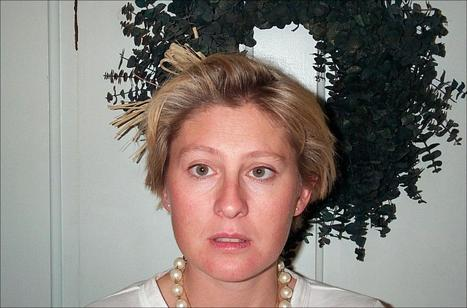

In [6]:
print(caltech101_dataset_train[0][2])
caltech101_dataset_train[0][0]

In [7]:
oxfordpets_dataset_train = CLIPDataset(datasets_path, 'oxfordpets', split='train')

100%|██████████| 792M/792M [00:33<00:00, 23.7MB/s]
100%|██████████| 19.2M/19.2M [03:35<00:00, 89.1kB/s]
Downloading...
From: https://drive.google.com/uc?id=1501r8Ber4nNKvmlFVQZ8SeUHTcdTTEqs
To: /content/datasets/oxford-iiit-pet/split.json
100%|██████████| 724k/724k [00:00<00:00, 8.00MB/s]


abyssinian


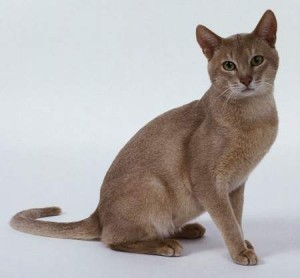

In [8]:
print(oxfordpets_dataset_train[0][2])
oxfordpets_dataset_train[0][0]

In [ ]:
flowers102_dataset_train = CLIPDataset(datasets_path, 'flowers102', split='train')

  2%|▏         | 7.63M/345M [01:34<43:28, 129kB/s]

In [ ]:
print(flowers102_dataset_train[0][2])
flowers102_dataset_train[0][0]

In [ ]:
food101_dataset = CLIPDataset(datasets_path, 'food101', split='train')

In [ ]:
print(food101_dataset[0][2])
food101_dataset[0][0]

In [ ]:
dtd_dataset_train = CLIPDataset(datasets_path, 'dtd', split='train')

In [ ]:
print(dtd_dataset_train[0][2])
dtd_dataset_train[0][0]

In [ ]:
eurosat_dataset_train = CLIPDataset(datasets_path, 'eurosat', split='train')

In [ ]:
print(eurosat_dataset_train[0][2])
eurosat_dataset_train[0][0]

In [ ]:
ucf101_dataset_train = CLIPDataset(datasets_path, 'ucf101', split='train')

In [ ]:
print(ucf101_dataset_train[0][2])
ucf101_dataset_train[0][0]